# Propagacion de la afinidad 

In [1]:
#IMPORTAMOS LOS PAQUETES A UTILIZAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
from sklearn.cluster import KMeans #importamos los paquetes a utilizar 
from itertools import cycle
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering #IMPORTAMOS EL PAQUETE
from sklearn.datasets.samples_generator import make_blobs

C:\Users\valen\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#GENERAMOS LOS CENTROS
centers = [[1,1],[-1,-1],[1,-1]]
X, labels = make_blobs(n_samples=300,centers=centers, cluster_std=0.5,random_state=0)

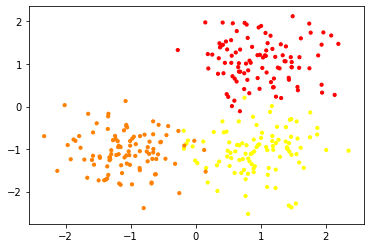

In [3]:

plt.scatter(X[:,0],X[:,1], c=labels, s=10, cmap="autumn")

In [4]:
af = AffinityPropagation (preference =-50,max_iter=1000).fit(X)

C:\Users\valen\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


In [5]:
cluster_centers_ids = af.cluster_centers_indices_

In [6]:
clus_labels = af.labels_

In [7]:
n_clust= len (cluster_centers_ids)
n_clust

3

In [8]:
def report_affinity_propagation(X):
    
    af = AffinityPropagation (preference =-50,max_iter=1000).fit(X)
    cluster_centers_ids = af.cluster_centers_indices_
    n_clust= len (cluster_centers_ids)
    clus_labels = af.labels_
    
    print("Numero estimado de cluster: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels,clus_labels))
    print ("Completitud: %0.3f"%metrics.completeness_score(labels,clus_labels))
    print ("V-measure: %0.3f"%metrics.v_measure_score(labels,clus_labels))
    print ("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels,clus_labels))
    print("Informacion mutua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels,clus_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    colors=cycle("mrkbgrmrkbgrmrkbgrmrkbgrmrkbgr")
    for k, col in zip(range(n_clust),colors):
        class_member= (clus_labels==k)
        clus_centers= X[cluster_centers_ids[k]]
        plt.plot(X[class_member,0],X[class_member,1], col+".")
        plt.plot(clus_centers[0],clus_centers[1],"o",markerfacecolor=col,markeredgecolor="k",markersize=14)
        for x in X[class_member]:
            plt.plot([clus_centers[0],x[0]], [clus_centers[1],x[1]],col)
        plt.title("Numero estimado de cluster: %d" %n_clust)
        

C:\Users\valen\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Numero estimado de cluster: 3
Homogeneidad: 0.872
Completitud: 0.872
V-measure: 0.872
R2 ajustado: 0.912
Informacion mutua ajustada: 0.871
Coeficiente de la silueta: 0.735


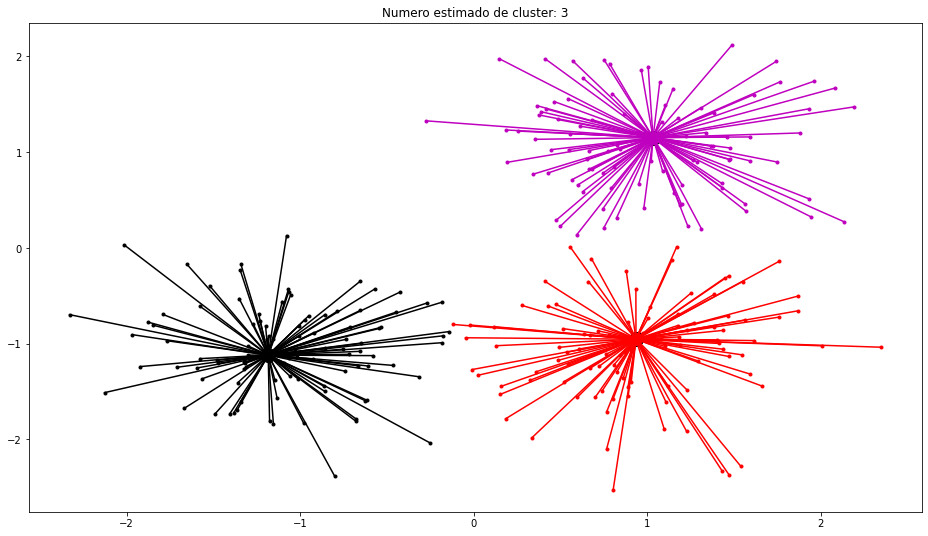

In [9]:
report_affinity_propagation(X)

In [ ]:
plt.scatter 

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
data = pd.read_csv("../datasets/archive/pollution_india_2010 (1).csv")

In [5]:
data.tail(50)

,City,NO2,PM10,SO2,State
131,Talcher,23,116,12,Orissa
132,Amritsar,36,219,14,Punjab
133,Bhatinda,21,216,9,Punjab
134,Dera Bassi,23,162,10,Punjab
135,Pathankot/DeraBaba,14,76,7,Punjab
136,Gobindgarh,35,224,18,Punjab
137,Jalandar,29,144,11,Punjab
138,Khanna,31,231,9,Punjab
139,Ludhiana,32,214,9,Punjab
140,Naya Nangal,16,94,7,Punjab


In [6]:
select = data.columns.values.tolist()[1:4]

In [7]:
select

['NO2', 'PM10', 'SO2']

In [8]:
NO2=((data["NO2"]).replace("Null","0"))
PM10=((data["PM10"]).replace("Null","0"))
SO2=(data["SO2"].replace("Null","0"))

In [9]:
data["NO2"]=NO2
data["PM10"]=PM10
data["SO2"]=SO2

In [10]:
data["NO2"]=pd.to_numeric(data['NO2'])
data["PM10"]=pd.to_numeric(data['PM10'])
data["SO2"]=pd.to_numeric(data['SO2'])

In [18]:
data["NO2"].mean()

24.08839779005525

In [19]:
data["PM10"].mean()

108.10497237569061

In [20]:
data["SO2"].mean()

9.94475138121547

In [21]:
NO2_ =((data["NO2"]).replace(0,24))
PM10_ =((data["PM10"]).replace(0,108))
SO2_ =(data["SO2"].replace(0,10))

In [22]:
data["NO2"]=NO2_
data["PM10"]=PM10_
data["SO2"]=SO2_

In [23]:
data2=data[select]

In [24]:
data.tail(50)

,City,NO2,PM10,SO2,State
131,Talcher,23,116,12,Orissa
132,Amritsar,36,219,14,Punjab
133,Bhatinda,21,216,9,Punjab
134,Dera Bassi,23,162,10,Punjab
135,Pathankot/DeraBaba,14,76,7,Punjab
136,Gobindgarh,35,224,18,Punjab
137,Jalandar,29,144,11,Punjab
138,Khanna,31,231,9,Punjab
139,Ludhiana,32,214,9,Punjab
140,Naya Nangal,16,94,7,Punjab


In [25]:
Z = linkage (data2, "ward")

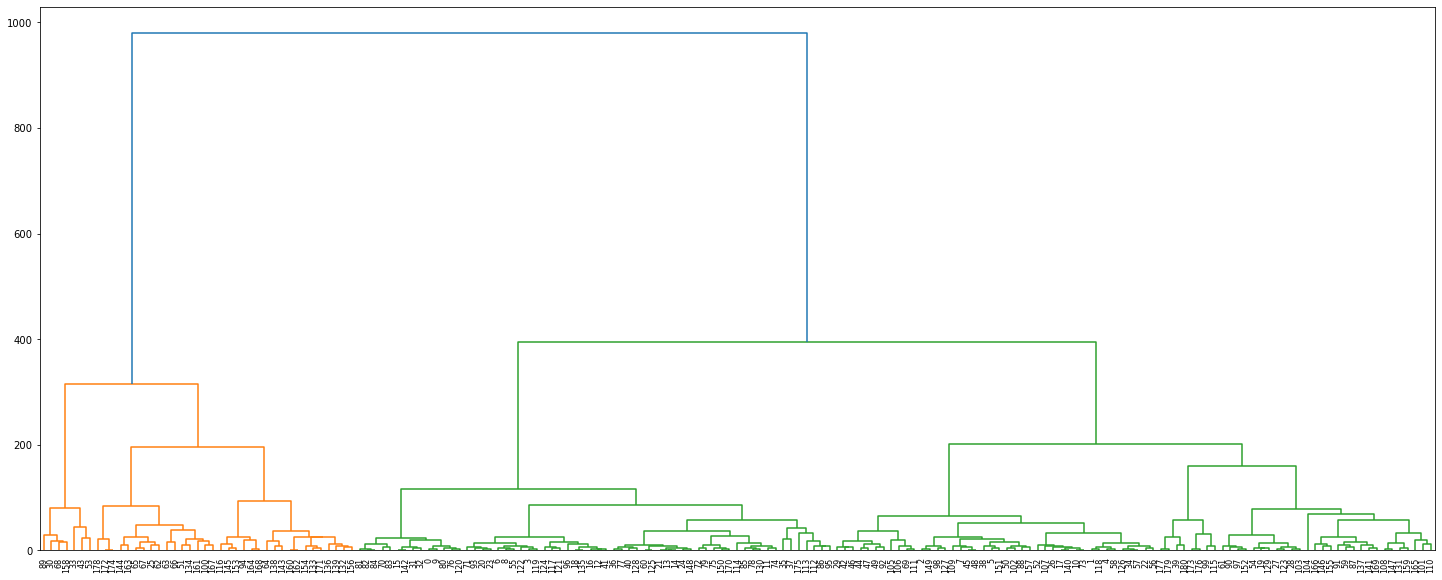

In [26]:
plt.figure(figsize=(25,10))
dendrogram (Z,leaf_rotation = 90., leaf_font_size = 8.,show_contracted= True)

plt.show()

[980.18159218 395.41847946 314.79326575 201.8064496  195.07937466
 160.17220396 116.18173053  93.62751258  85.82279477  83.26637053]


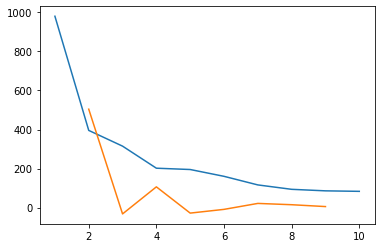

El número óptimo de cluster es 2


In [28]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [30]:
clus = AgglomerativeClustering(n_clusters=2 , linkage="ward").fit(data2) #generamos el modelo 

In [41]:
model = KMeans(n_clusters=2) #generamos el modelo 
model.fit(data2) #le indicamos los parametros 

KMeans(n_clusters=2)

In [42]:
data["cluster"]= model.labels_

In [43]:
data.head(50)

,City,NO2,PM10,SO2,State,cluster
0,Chitoor,9,39,4,Andhra Pradesh,0
1,Guntur,11,81,2,Andhra Pradesh,0
2,Hydrabad,24,79,5,Andhra Pradesh,0
3,Kothagudem,11,62,2,Andhra Pradesh,0
4,Kurnool,9,85,4,Andhra Pradesh,0
5,Nalgonda,23,85,5,Andhra Pradesh,0
6,Nellore,12,65,2,Andhra Pradesh,0
7,Patencheru,23,76,11,Andhra Pradesh,0
8,Ramagundam,12,68,4,Andhra Pradesh,0
9,Tirupati,9,37,4,Andhra Pradesh,0


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [37]:
x1 = np.array(data2["NO2"])
x2 = np.array(data["PM10"])
X = np.array(list(zip(x1,x2))).reshape(len(x1), 2)

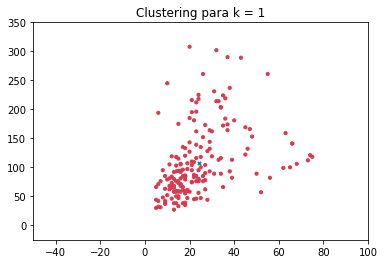

* Para k =  2  el promedio de la silueta es de : 0.6384364832806076
   - Para i =  1  la silueta del cluster vale :  0.5240317903490526
   - Para i =  2  la silueta del cluster vale :  0.674084322382469


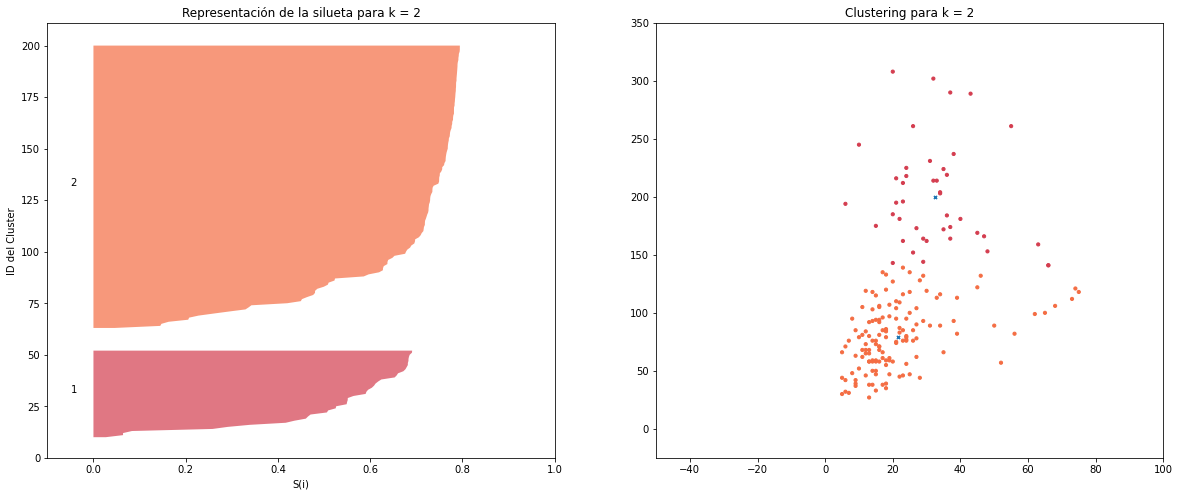

* Para k =  3  el promedio de la silueta es de : 0.5122005601370452
   - Para i =  1  la silueta del cluster vale :  0.5059106184748163
   - Para i =  2  la silueta del cluster vale :  0.3421786832057546
   - Para i =  3  la silueta del cluster vale :  0.5996245997840847


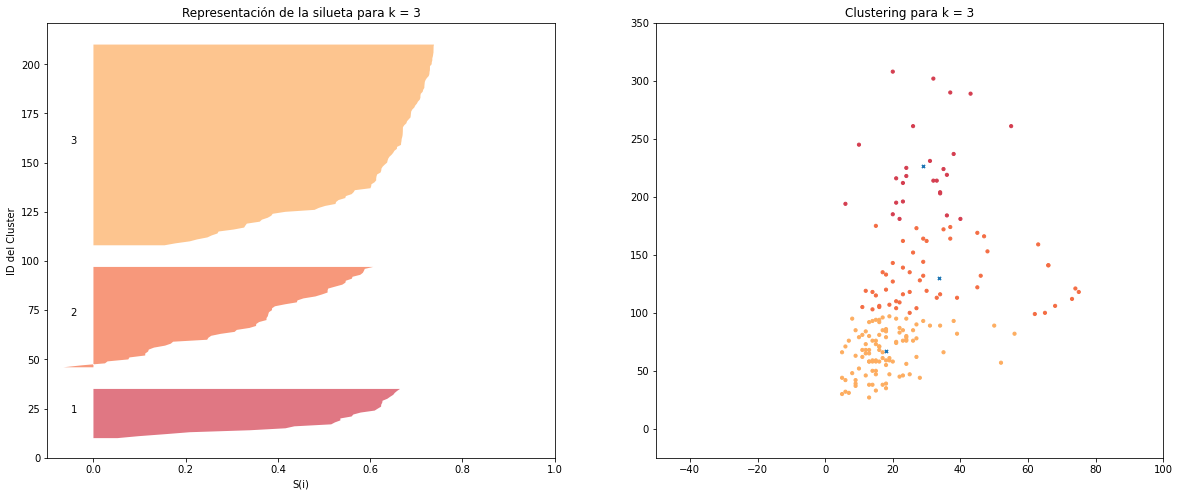

* Para k =  4  el promedio de la silueta es de : 0.45176653119008353
   - Para i =  1  la silueta del cluster vale :  0.3436444985139349
   - Para i =  2  la silueta del cluster vale :  0.4278263341487914
   - Para i =  3  la silueta del cluster vale :  0.5439297549168292
   - Para i =  4  la silueta del cluster vale :  0.4442753120534718


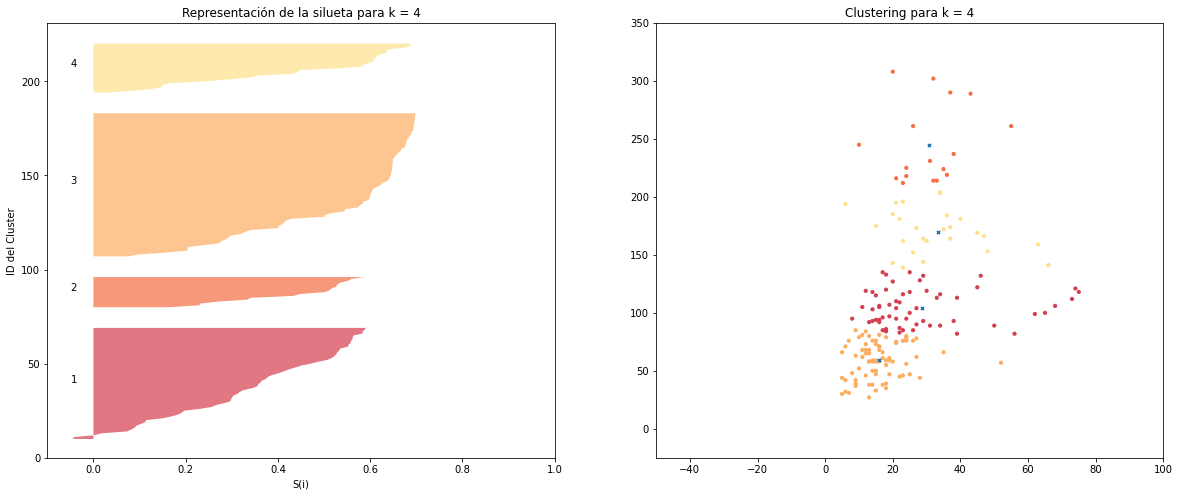

* Para k =  5  el promedio de la silueta es de : 0.44045048501067624
   - Para i =  1  la silueta del cluster vale :  0.454553135349958
   - Para i =  2  la silueta del cluster vale :  0.4676534895276447
   - Para i =  3  la silueta del cluster vale :  0.5073234465340083
   - Para i =  4  la silueta del cluster vale :  0.4777534355984659
   - Para i =  5  la silueta del cluster vale :  0.26340375648219344


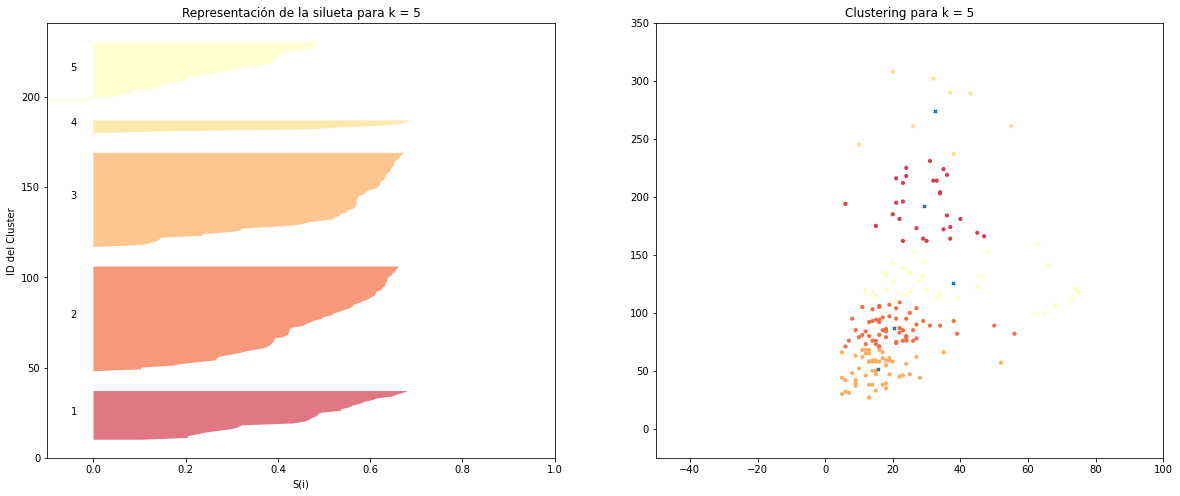

* Para k =  6  el promedio de la silueta es de : 0.4418394693223847
   - Para i =  1  la silueta del cluster vale :  0.4940399987420634
   - Para i =  2  la silueta del cluster vale :  0.5226199901887707
   - Para i =  3  la silueta del cluster vale :  0.22985598161278029
   - Para i =  4  la silueta del cluster vale :  0.5375148873398102
   - Para i =  5  la silueta del cluster vale :  0.4637168789497688
   - Para i =  6  la silueta del cluster vale :  0.4531625937533459


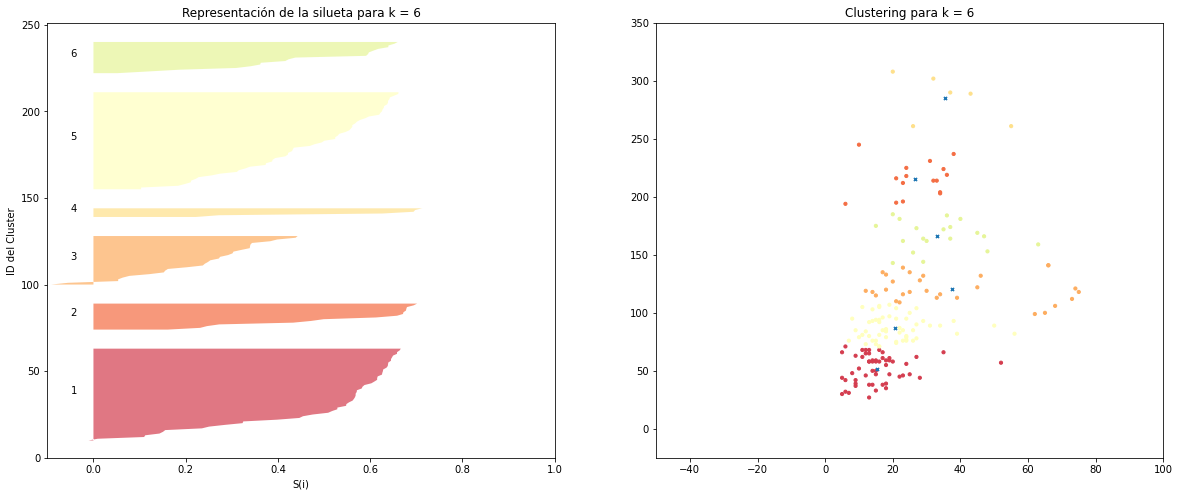

* Para k =  7  el promedio de la silueta es de : 0.4648438789326794
   - Para i =  1  la silueta del cluster vale :  0.3943354946161693
   - Para i =  2  la silueta del cluster vale :  0.47725687155807595
   - Para i =  3  la silueta del cluster vale :  0.485683155284985
   - Para i =  4  la silueta del cluster vale :  0.5375148873398102
   - Para i =  5  la silueta del cluster vale :  0.4648604015265541
   - Para i =  6  la silueta del cluster vale :  0.5123863713525829
   - Para i =  7  la silueta del cluster vale :  0.40566341554532853


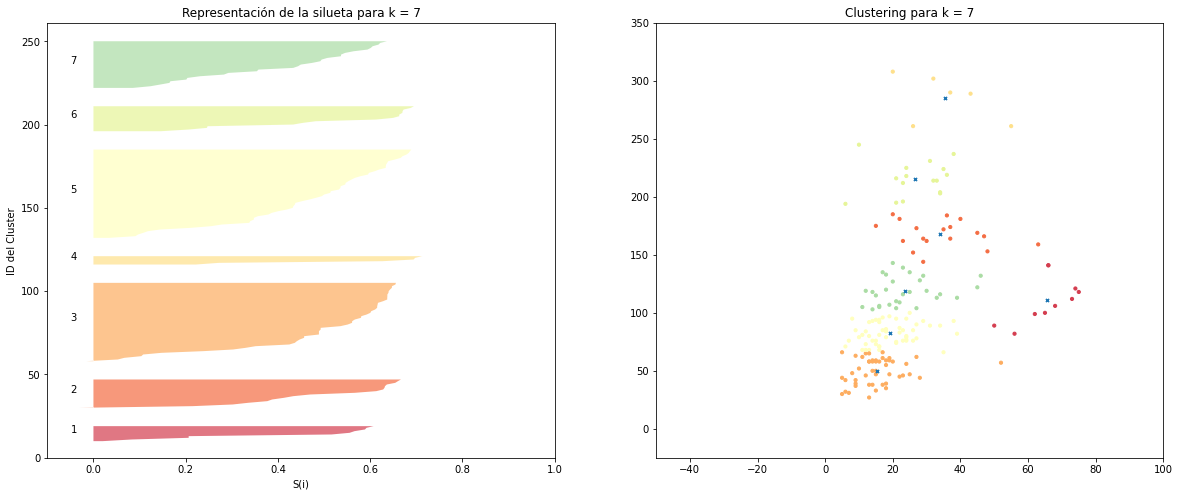

* Para k =  8  el promedio de la silueta es de : 0.4303532348929247
   - Para i =  1  la silueta del cluster vale :  0.5407071905786305
   - Para i =  2  la silueta del cluster vale :  0.49255869772115757
   - Para i =  3  la silueta del cluster vale :  0.3731232961513548
   - Para i =  4  la silueta del cluster vale :  0.5007111261540829
   - Para i =  5  la silueta del cluster vale :  0.4036399690331724
   - Para i =  6  la silueta del cluster vale :  0.5375148873398102
   - Para i =  7  la silueta del cluster vale :  0.3835615129966094
   - Para i =  8  la silueta del cluster vale :  0.37638556659229766


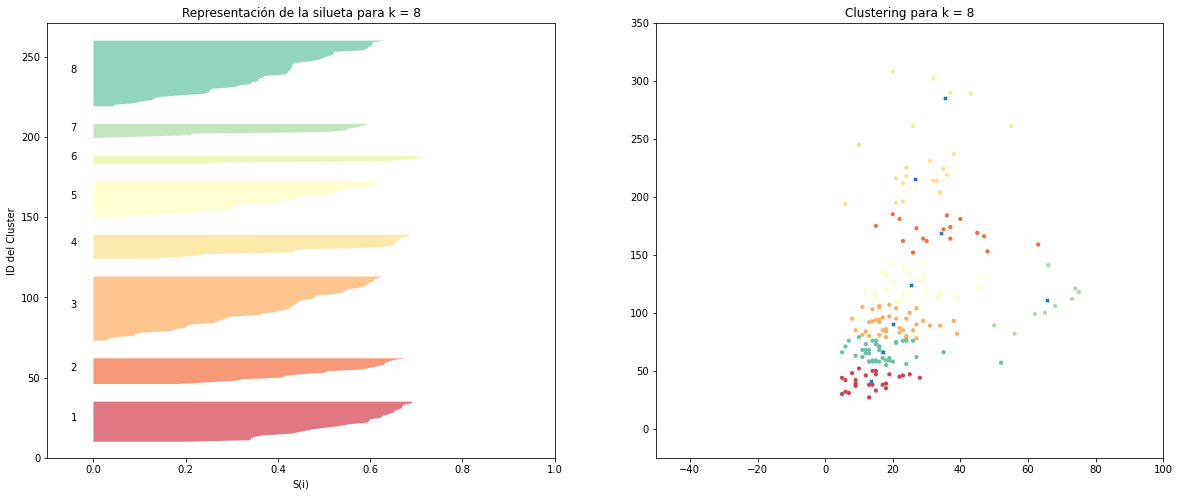

* Para k =  9  el promedio de la silueta es de : 0.4205479022607212
   - Para i =  1  la silueta del cluster vale :  0.49198048214781764
   - Para i =  2  la silueta del cluster vale :  0.40373486026164074
   - Para i =  3  la silueta del cluster vale :  0.3770941768386871
   - Para i =  4  la silueta del cluster vale :  0.5375148873398102
   - Para i =  5  la silueta del cluster vale :  0.36371258182097443
   - Para i =  6  la silueta del cluster vale :  0.5022155558637359
   - Para i =  7  la silueta del cluster vale :  0.35841782534433814
   - Para i =  8  la silueta del cluster vale :  0.44272067583129515
   - Para i =  9  la silueta del cluster vale :  0.4125784470911905


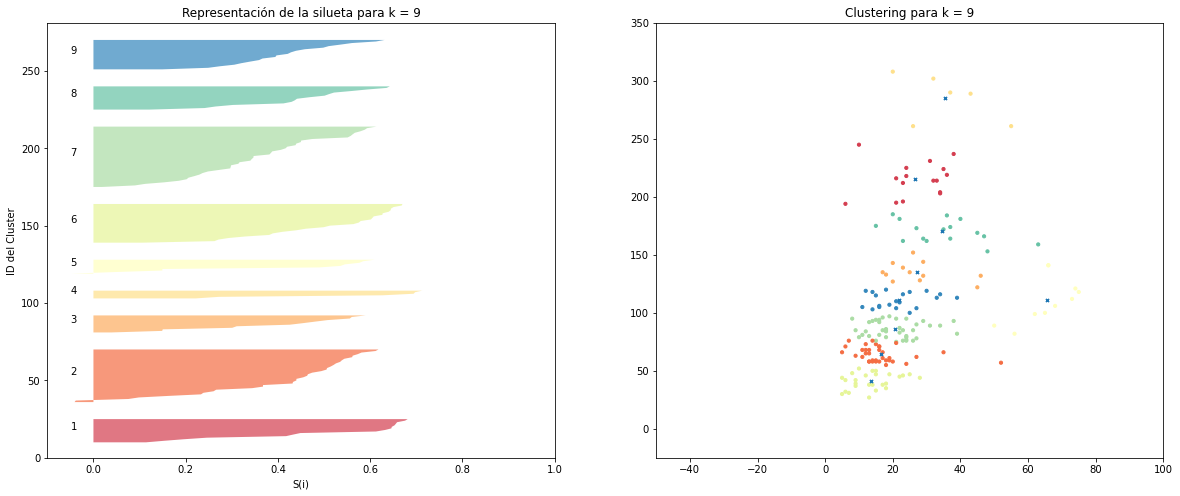

In [38]:
max_k = 10## maximo número de clusters que vamos a crear
K = range(1,max_k)
ssw = []
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ##Fabricaremos una silueta para cada cluster
    # Por seguridad, no hacemos silueta si k = 1 o k = len(X)
    if 1<k<len(X):
       ##Crear un subplot de una fila y dos columnas
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
    
        #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        #El número de clusters a insertar determinará el tamaño de cada barra
        #El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos 
        #entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(X)+ (k+1)*10])
    
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1, " la silueta del cluster vale : ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
        
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([-50,100])
    plt.ylim([-25,350])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2, s=10, c=label_color)
    plt.scatter(centers[0], centers[1], s=10, marker = "x")
    plt.show()

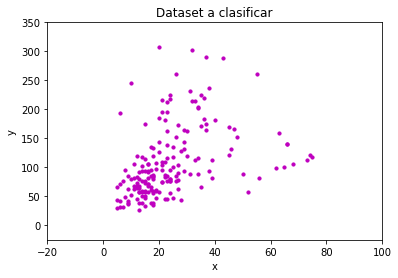

In [39]:
plt.plot()
plt.xlim([-20,100])
plt.ylim([-25,350])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2,s=10,c="m")
plt.show()



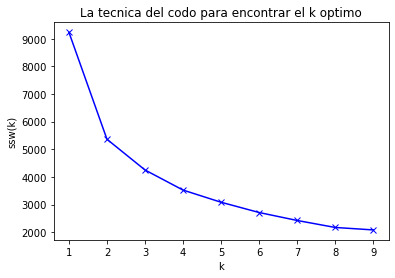

In [90]:
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("ssw(k)")
plt.title("La tecnica del codo para encontrar el k optimo")
plt.show()

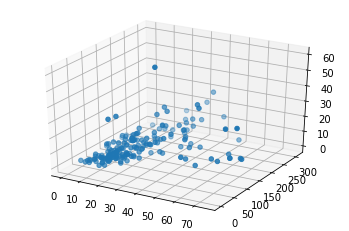

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d") #REALIZAMOS UN GRAFICO 3D PARA VER LOS PUNTOS
ax.scatter(xs = data2 ["NO2"], ys = data2["PM10"],zs = data ["SO2"])